## 0) Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree

from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


#Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = df.drop('class', axis=1)
y = df['class']

## Exercise 1

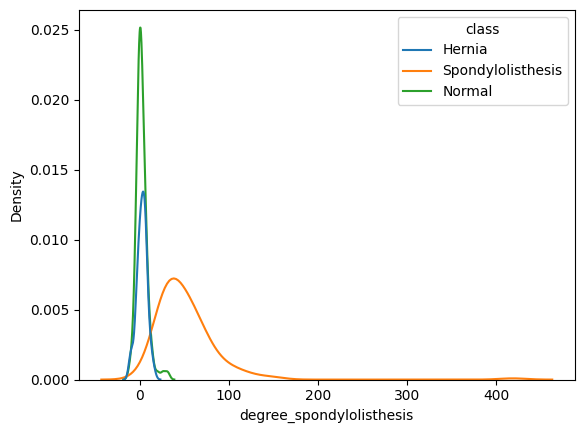

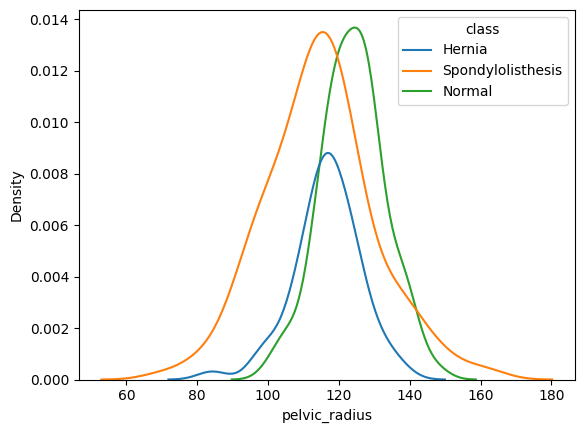

In [3]:
f_score, f_pvalues = f_classif(X, y)

data_tb = {'F-score': f_score, 'p-values': f_pvalues}
tb = pd.DataFrame(data_tb)

#Input variable w/ highest discriminative power: degree_spondylolisthesis
#Input variable w/ lowest discriminative power: pelvic_radius

sns.kdeplot(data=df, x='degree_spondylolisthesis', hue='class')
plt.show()

sns.kdeplot(data=df, x='pelvic_radius', hue='class')
plt.show()

The degree_spondylolisthesis input variable is the one that has the most discriminative power out of the 6 and pelvic_tilt is the one with less discriminative power

## Exercise 2

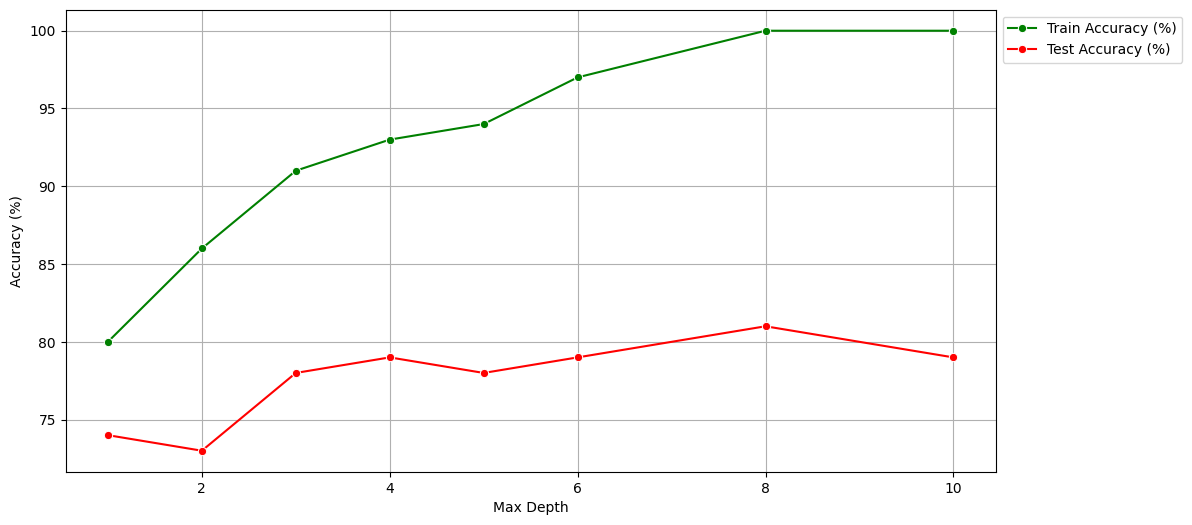

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
depth_values = [1, 2, 3, 4, 5, 6, 8, 10]
df_data = []

for depth_value in depth_values:
    test_accuracy_mean = 0
    training_accuracy_mean = 0
    for i in range(10):
        predictor = tree.DecisionTreeClassifier(max_depth=depth_value)
        predictor.fit(X_train, y_train)

        y_pred = predictor.predict(X_test)
        y_train_pred = predictor.predict(X_train)

        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        training_accuracy = metrics.accuracy_score(y_train, y_train_pred)
        
        test_accuracy_mean += test_accuracy
        training_accuracy_mean += training_accuracy
        
    test_accuracy_mean = round(test_accuracy_mean / 10, 2) * 100
    training_accuracy_mean = round(training_accuracy_mean / 10, 2) * 100
    df_data.append({"Max Depth": depth_value, "Test Accuracy (%)": test_accuracy_mean, "Train Accuracy (%)": training_accuracy_mean})

df = pd.DataFrame(df_data, columns=["Max Depth", "Test Accuracy (%)", "Train Accuracy (%)"])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Max Depth', y="Train Accuracy (%)", label="Train Accuracy (%)", data=df, color='g', marker='o')
sns.lineplot(x='Max Depth', y="Test Accuracy (%)", label="Test Accuracy (%)", data=df, color='r', marker='o')
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid()

## Exercise 3

- As one can see, the Training Accuracy is higher than the Testing Accuracy. This is due to the model using the training data to make predictions and therefore, expected to perform better with that data.

- Nevertheless, it's also possible to observe that as the Decision Tree Depth increases, so does the Training Accuracy. This occurs, because the deeper the tree, the more complex and specific to the training data it gets.

- That's why, from a certain point onwards, the Testing Accuracy starts to decline. It gets so specific that it overfits the data and, therefore, loses generalization.

- We can then confirm that the best Max Depth one can use in this case is 8, since this is where we're able to see the best accuracies in both groups.

## Exercise 4

[]

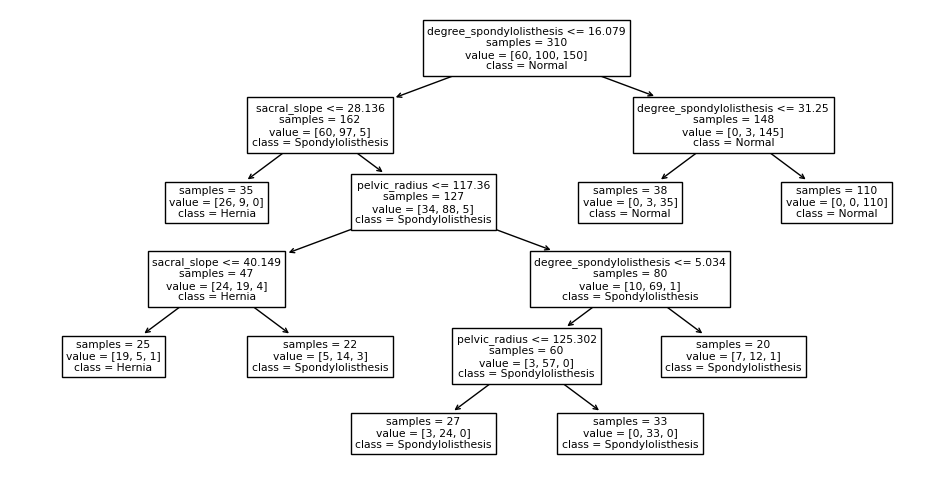

In [ ]:
X_train = X
y_train = y

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(X_train, y_train)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"], class_names=["Hernia", "Spondylolisthesis", "Normal"], impurity=False)
plt.plot()